<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Assignment-#9-." data-toc-modified-id="Assignment-#9-.-1">Assignment #9 .</a></span><ul class="toc-item"><li><span><a href="#Time-series-analysis" data-toc-modified-id="Time-series-analysis-1.1">Time series analysis</a></span></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-1.2">Data preparation</a></span></li><li><span><a href="#Predicting-with-FB-Prophet" data-toc-modified-id="Predicting-with-FB-Prophet-1.3">Predicting with FB Prophet</a></span><ul class="toc-item"><li><span><a href="#Question-1:-What-is-the-prediction-for-1st-of-January-17-00:00:00?" data-toc-modified-id="Question-1:-What-is-the-prediction-for-1st-of-January-17-00:00:00?-1.3.1"><font color="red">Question 1:</font> What is the prediction for 1st of January 17 00:00:00?</a></span></li><li><span><a href="#Question-2:-What-is-MAPE-equal-to?" data-toc-modified-id="Question-2:-What-is-MAPE-equal-to?-1.3.2"><font color="red">Question 2:</font> What is MAPE equal to?</a></span></li><li><span><a href="#Question-3:-What-is-MAE-equal-to?" data-toc-modified-id="Question-3:-What-is-MAE-equal-to?-1.3.3"><font color="red">Question 3:</font> What is MAE equal to?</a></span></li></ul></li><li><span><a href="#Predicting-with-ARIMA" data-toc-modified-id="Predicting-with-ARIMA-1.4">Predicting with ARIMA</a></span><ul class="toc-item"><li><span><a href="#Question-4:-What's-the-stationarity?" data-toc-modified-id="Question-4:-What's-the-stationarity?-1.4.1"><font color="red">Question 4:</font> What's the stationarity?</a></span></li><li><span><a href="#Question-5:-Best-hyperparameters-before-Box-Cox-transformation?" data-toc-modified-id="Question-5:-Best-hyperparameters-before-Box-Cox-transformation?-1.4.2"><font color="red">Question 5:</font> Best hyperparameters before Box-Cox transformation?</a></span></li><li><span><a href="#Question-6:-Best-hyperparameters-after-Box-Cox-transformation?" data-toc-modified-id="Question-6:-Best-hyperparameters-after-Box-Cox-transformation?-1.4.3"><font color="red">Question 6:</font> Best hyperparameters after Box-Cox transformation?</a></span></li><li><span><a href="#Question-7:-Draw-final-prediction-and-historical-data" data-toc-modified-id="Question-7:-Draw-final-prediction-and-historical-data-1.4.4"><font color="red">Question 7:</font> Draw final prediction and historical data</a></span></li></ul></li></ul></li></ul></div>

<center>
<img src="https://habrastorage.org/files/fd4/502/43d/fd450243dd604b81b9713213a247aa20.jpg">
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 
<center>Author: [Mariya Mansurova](https://www.linkedin.com/in/mariya-mansurova-04070982/), analyst & developer in Yandex.Metrics team. <br>Translated by [Ivan Zakharov](https://www.linkedin.com/in/ivan-zakharov/), ML enthusiast.
<br>All content is distributed under the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

# Assignment #9 . 
## Time series analysis

<font color='red'>Fill cells marked with "Your code here" and write answer below question after text "Type your answer here:"
    </font>    

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd


from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
import requests

from plotly import __version__
print(__version__) # need 1.9.0 or greater
init_notebook_mode(connected = True)


def plotly_df(df, title = ''):
    data = []
    
    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)
    
    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

4.5.2


## Data preparation

In [2]:
df = pd.read_csv('hour_online.csv')
df = df[df['Users'] != 0]
df.head()

,Time,Users
0,1/1/17 0:00,34002
1,1/1/17 1:00,37947
2,1/1/17 2:00,41517
3,1/1/17 3:00,44476
4,1/1/17 4:00,46234


In [3]:
df.shape

(2616, 2)

## Predicting with FB Prophet
We will train at first 5 months and predict the number of trips for June.

In [4]:
df.Time = pd.to_datetime(df.Time)


In [5]:
plotly_df(df.set_index('Time')[["Users"]])

In [6]:
from fbprophet import Prophet

In [7]:
predictions = 30

df.columns = ['ds', 'y']
df.tail()

,ds,y
2620,2017-04-20 05:00:00,34833
2621,2017-04-20 06:00:00,35932
2622,2017-04-20 07:00:00,38418
2623,2017-04-20 08:00:00,40238
2624,2017-04-20 09:00:00,40763


In [8]:
train_df = df[:-predictions].copy()

In [9]:
m = Prophet()
m.fit(train_df);

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [10]:
future = m.make_future_dataframe(periods=predictions, freq = 'H')
future.tail()

,ds
2611,2017-04-20 05:00:00
2612,2017-04-20 06:00:00
2613,2017-04-20 07:00:00
2614,2017-04-20 08:00:00
2615,2017-04-20 09:00:00


In [11]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2611,2017-04-20 05:00:00,35313.552909,36630.333141,48567.422120,35304.147532,35314.108172,7401.138199,7401.138199,7401.138199,8788.263876,8788.263876,8788.263876,-1387.125677,-1387.125677,-1387.125677,0.0,0.0,0.0,42714.691108
2612,2017-04-20 06:00:00,35322.168780,39847.698640,50926.386781,35307.131179,35327.349966,10094.722149,10094.722149,10094.722149,11417.666438,11417.666438,11417.666438,-1322.944289,-1322.944289,-1322.944289,0.0,0.0,0.0,45416.890929
2613,2017-04-20 07:00:00,35330.784651,41721.463034,53041.032355,35313.169600,35339.537332,11946.979577,11946.979577,11946.979577,13203.364932,13203.364932,13203.364932,-1256.385356,-1256.385356,-1256.385356,0.0,0.0,0.0,47277.764228
2614,2017-04-20 08:00:00,35339.400522,43343.307034,55007.874884,35315.307054,35350.771038,13551.414423,13551.414423,13551.414423,14739.078775,14739.078775,14739.078775,-1187.664352,-1187.664352,-1187.664352,0.0,0.0,0.0,48890.814945
2615,2017-04-20 09:00:00,35348.016393,44141.941825,55934.434120,35315.159388,35366.791648,14838.393219,14838.393219,14838.393219,15955.382618,15955.382618,15955.382618,-1116.989399,-1116.989399,-1116.989399,0.0,0.0,0.0,50186.409613


### <font color='red'>Question 1:</font> What is the prediction for 1st of January 17 00:00:00?

What is the prediction of the number of views of the wiki page on 1st of January 17? Round to the nearest integer.

- Type your answer here: <font color='red'>39051</font>


In [12]:
# You code here

np.round(forecast[forecast.ds == '2017-01-01'].yhat)

0    39051.0
Name: yhat, dtype: float64

Estimate the quality of the prediction with the last 30 points.

### <font color='red'>Question 2:</font> What is MAPE equal to?

- Type your answer here: <font color='red'>12.69</font>

### <font color='red'>Question 3:</font> What is MAE equal to?

- Type your answer here: <font color='red'>4349.67</font> 


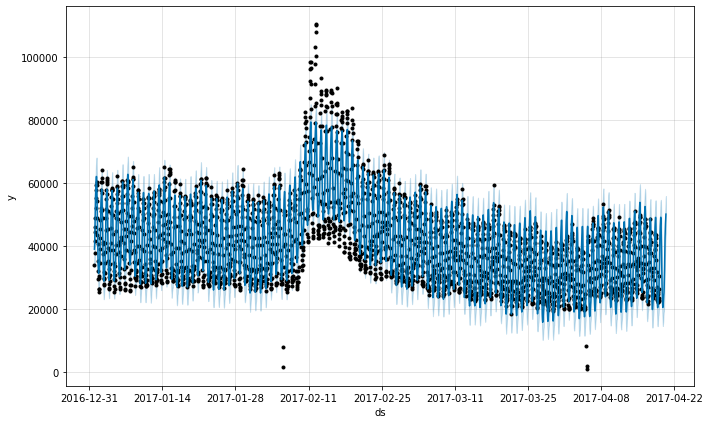

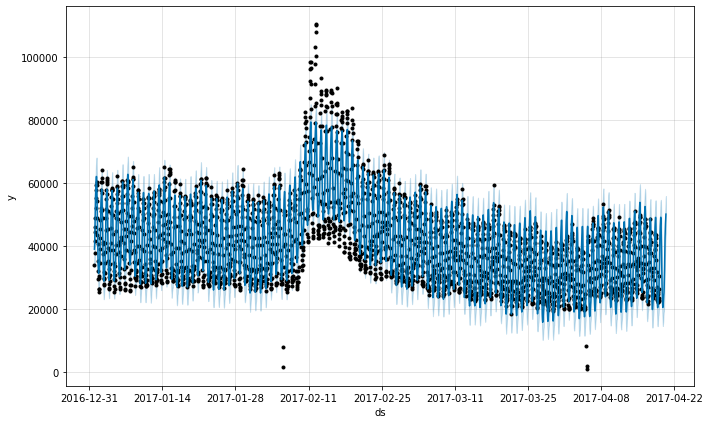

In [13]:
# You code here
m.plot(forecast)

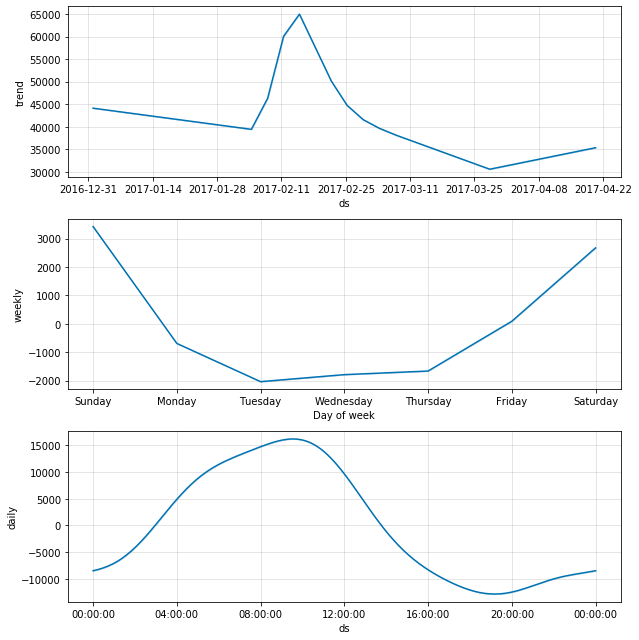

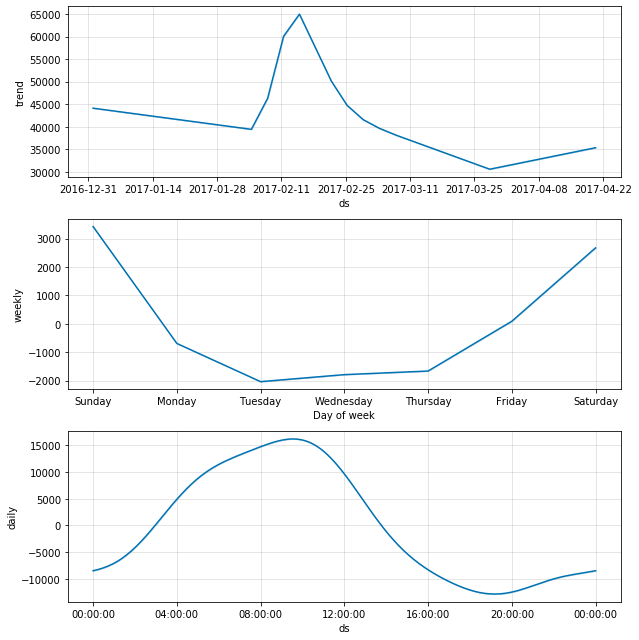

In [14]:
m.plot_components(forecast)

In [15]:
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df.set_index('ds'))

In [16]:
import numpy as np
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100 * cmp_df['e'] / cmp_df['y']
print('MAPE = ', round(np.mean(abs(cmp_df[-predictions:]['p'])), 2))
print('MAE = ', round(np.mean(abs(cmp_df[-predictions:]['e'])), 2))

MAPE =  12.69
MAE =  4349.67


In [17]:
cmp_df

,yhat,yhat_lower,yhat_upper,y,e,p
ds,,,,,,
2017-01-01 00:00:00,39050.632700,33464.616461,44344.186774,34002,-5048.632700,-14.848046
2017-01-01 01:00:00,40341.933912,34610.404913,45667.900619,37947,-2394.933912,-6.311260
2017-01-01 02:00:00,43149.350471,37284.549018,49171.247062,41517,-1632.350471,-3.931764
2017-01-01 03:00:00,47360.561810,42004.045120,52825.804274,44476,-2884.561810,-6.485659
2017-01-01 04:00:00,51930.877842,46243.521234,57484.106026,46234,-5696.877842,-12.321836
...,...,...,...,...,...,...
2017-04-20 05:00:00,42714.691108,36630.333141,48567.422120,34833,-7881.691108,-22.627081
2017-04-20 06:00:00,45416.890929,39847.698640,50926.386781,35932,-9484.890929,-26.396780
2017-04-20 07:00:00,47277.764228,41721.463034,53041.032355,38418,-8859.764228,-23.061493


## Predicting with ARIMA

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (15, 10)

### <font color='red'>Question 4:</font> What's the stationarity?

Let's verify the stationarity of the series using the Dickey-Fuller test. Is the series stationary? What is the p-value?

- Is the series stationary (yes/no)? Answer: <font color='red'>No</font>
- What is p_value? Answer: p = <font color='red'>0.255738</font>

Dickey-Fuller test: p=0.255738


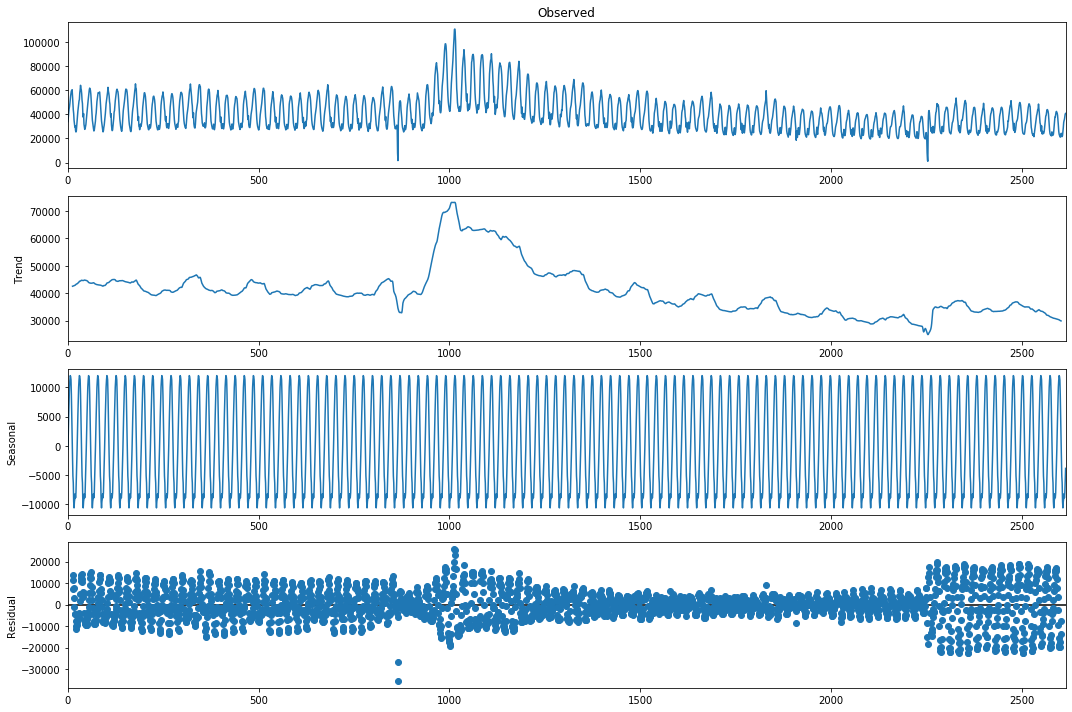

In [19]:
# You code here
sm.tsa.seasonal_decompose(df['y'].values, freq=24).plot();
print("Dickey-Fuller test: p=%f" % sm.tsa.stattools.adfuller(df['y'])[1])

**Next, we turn to the construction of the SARIMAX model (`sm.tsa.statespace.SARIMAX`).<br> 
### <font color='red'>Question 5:</font> Best hyperparameters before Box-Cox transformation?

Try 1st and 2nd diff.

What parameters are the best for the model according to the `AIC` criterion?

Choose one option:

- p = 3, d = 0, q = 2, P = 2, D = 1, Q = 1
- p = 3, d = 1, q = 6, P = 2, D = 1, Q = 1 <font color='red'> - this one gives best AIC (46724)</font>
- p = 5, d = 1, q = 6, P = 1, D = 0, Q = 1
- p = 7, d = 0, q = 7, P = 2, D = 2, Q = 2




Dickey-Fuller test: p=0.000000


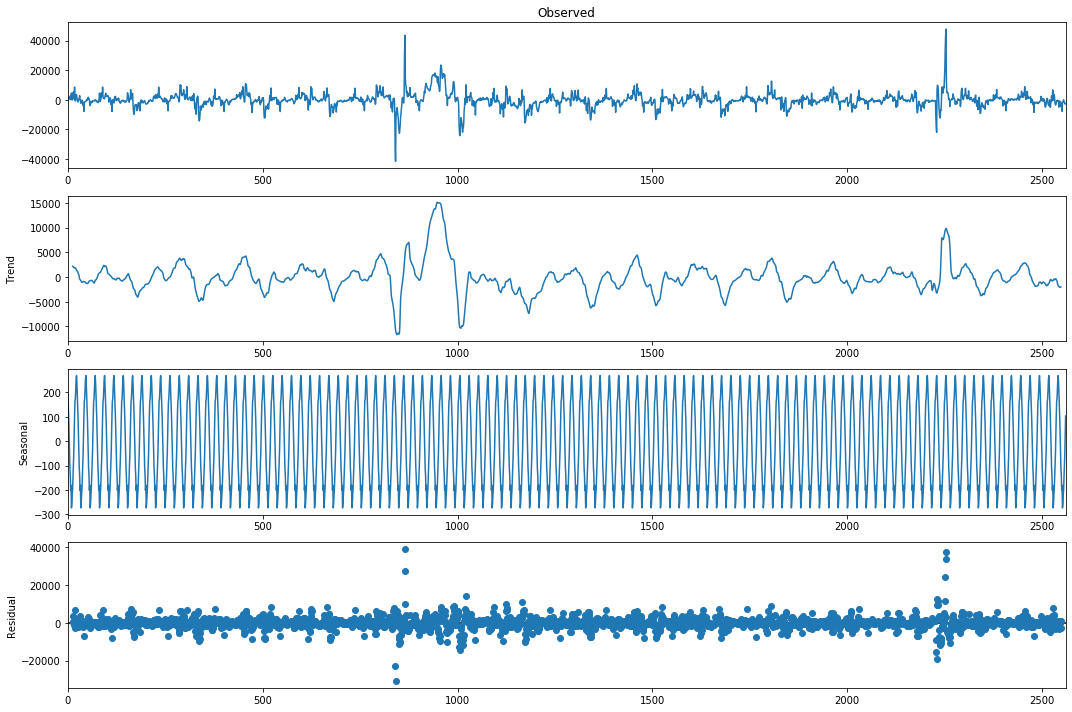

In [20]:
# But the seasonally differentiated series will already be stationary.
# We switch from df to train_df here as it does not change the overall result, but will be valuable later

train_df['y_diff'] = train_df.y - train_df.y.shift(24)
sm.tsa.seasonal_decompose(train_df.y_diff[24:].values, freq=24).plot();
print("Dickey-Fuller test: p=%f" % sm.tsa.stattools.adfuller(train_df.y_diff[24:])[1])

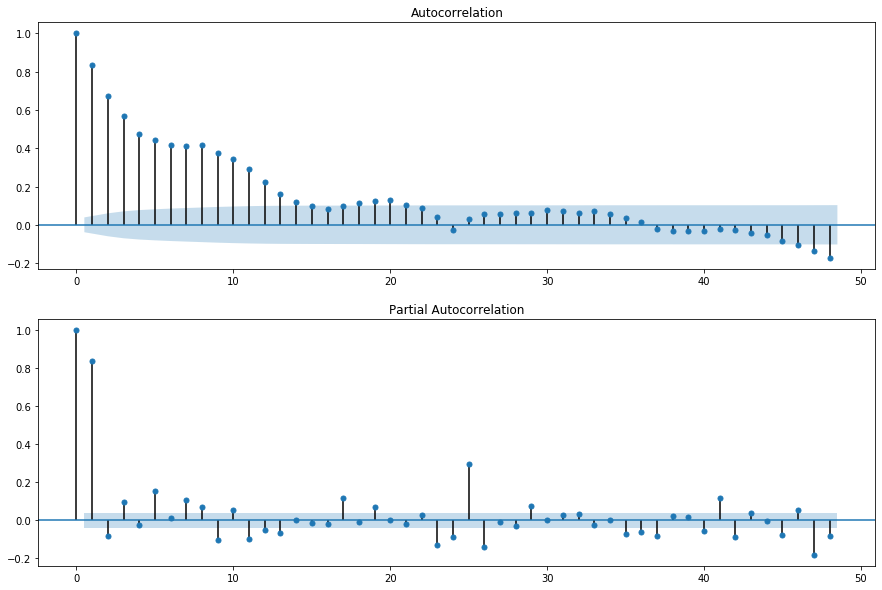

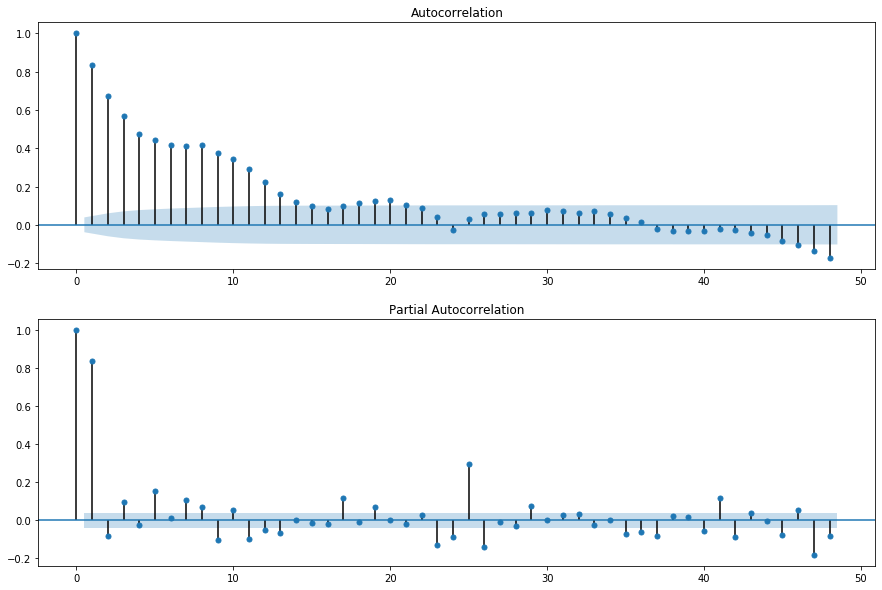

In [21]:
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(train_df.y_diff[24:].values.squeeze(), lags=48, ax=ax)

ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(train_df.y_diff[24:].values.squeeze(), lags=48, ax=ax)

In [24]:
# This is quick and dirty way to get the answer to Question 5.
# In real life you should uncomment next two cells.

parameters_list = [(3,0,2,2,1,1),(3,1,6,2,1,1),(5,1,6,1,0,1),(7,0,7,2,2,2)]

In [22]:
# ps = range(3, 7)
# ds = range(0, 1)
# qs = range(2, 7)
# Ps = range(0, 2)
# Ds = range(0, 2)
# Qs = range(1, 2)

In [23]:
# from itertools import product

# parameters = product(ps, ds, qs, Ps, Ds, Qs)
# parameters_list = list(parameters)
# len(parameters_list)

80

In [25]:
%%time
import warnings
from tqdm import tqdm
results1 = []
best_aic = float("inf")
warnings.filterwarnings('ignore')

for param in tqdm(parameters_list):
    #try except is necessary, because on some sets of parameters the model can not be trained
    try:
        model=sm.tsa.statespace.SARIMAX(train_df['y'], order=(param[0], param[1], param[2]), 
                                        seasonal_order=(param[3], param[4], param[5], 24)).fit(disp=-1)
    #print parameters on which the model is not trained and proceed to the next set
    except (ValueError, np.linalg.LinAlgError):
        continue
    aic = model.aic
    #save the best model, aic, parameters
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results1.append([param, model.aic])

100%|██████████| 4/4 [29:07<00:00, 436.81s/it]

CPU times: user 1h 43min 16s, sys: 9min 31s, total: 1h 52min 47s
Wall time: 29min 7s


In [26]:
result_table1 = pd.DataFrame(results1)
result_table1.columns = ['parameters', 'aic']
print(result_table1.sort_values(by = 'aic', ascending=True).head())

           parameters           aic
1  (3, 1, 6, 2, 1, 1)  46723.852864
0  (3, 0, 2, 2, 1, 1)  46776.519824
2  (5, 1, 6, 1, 0, 1)  47204.956074
3  (7, 0, 7, 2, 2, 2)  47677.989438


In [27]:
result_table1[result_table1['parameters'].isin([(3,0,2,2,1,1),
                                                (3,1,6,2,1,1),
                                                (5,1,6,1,0,1),
                                                (7,0,7,2,2,2)])]

,parameters,aic
0,"(3, 0, 2, 2, 1, 1)",46776.519824
1,"(3, 1, 6, 2, 1, 1)",46723.852864
2,"(5, 1, 6, 1, 0, 1)",47204.956074
3,"(7, 0, 7, 2, 2, 2)",47677.989438


**Next, we turn to the construction of the SARIMAX model (`sm.tsa.statespace.SARIMAX`).<br> 
### <font color='red'>Question 6:</font> Best hyperparameters after Box-Cox transformation?

No do the same as in Question 5, but with Box-Cox transformation.

What is the optimal Box-Cox transformation parameter?

- Type answer here: <font color='red'>0.246704</font>

What parameters are the best for the model according to the `AIC` criterion?

Choose on option:

- p = 3, d = 0, q = 2, P = 2, D = 1, Q = 1  <font color='red'> - this one gives best AIC (7935)</font>
- p = 3, d = 1, q = 6, P = 2, D = 1, Q = 1
- p = 5, d = 1, q = 6, P = 1, D = 0, Q = 1
- p = 7, d = 0, q = 7, P = 2, D = 2, Q = 2


Now do the same, but for the series with Box-Cox transformation.

In [28]:
import scipy.stats
train_df['y_box'], lmbda = scipy.stats.boxcox(train_df['y']) 
print("The optimal Box-Cox transformation parameter: %f" % lmbda)

The optimal Box-Cox transformation parameter: 0.246704


In [29]:
# You code here
results2 = []
best_aic = float("inf")

for param in tqdm(parameters_list):
    #try except is necessary, because on some sets of parameters the model can not be trained
    try:
        model=sm.tsa.statespace.SARIMAX(train_df['y_box'], order=(param[0], param[1], param[2]), 
                                        seasonal_order=(param[3], param[4], param[5], 24)).fit(disp=-1)
    #print parameters on which the model is not trained and proceed to the next set
    except (ValueError, np.linalg.LinAlgError):
        continue
    aic = model.aic
    #save the best model, aic, parameters
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results2.append([param, model.aic])
    
warnings.filterwarnings('default')

100%|██████████| 4/4 [22:02<00:00, 330.67s/it]


In [30]:
result_table2 = pd.DataFrame(results2)
result_table2.columns = ['parameters', 'aic']
print(result_table2.sort_values(by = 'aic', ascending=True).head())

           parameters          aic
0  (3, 0, 2, 2, 1, 1)  7935.188823
1  (3, 1, 6, 2, 1, 1)  7942.720499
2  (5, 1, 6, 1, 0, 1)  8009.998022
3  (7, 0, 7, 2, 2, 2)  8056.267378


In [31]:
result_table2[result_table2['parameters'].isin([(3,0,2,2,1,1),
                                                (3,1,6,2,1,1),
                                                (5,1,6,1,0,1),
                                                (7,0,7,2,2,2)])].sort_values(by='aic')

,parameters,aic
0,"(3, 0, 2, 2, 1, 1)",7935.188823
1,"(3, 1, 6, 2, 1, 1)",7942.720499
2,"(5, 1, 6, 1, 0, 1)",8009.998022
3,"(7, 0, 7, 2, 2, 2)",8056.267378


 
### <font color='red'>Question 7:</font> Draw final prediction and historical data

Don't forget to invere Box-Cox...

In [32]:
# You code here
print(best_model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                y_box   No. Observations:                 2586
Model:             SARIMAX(3, 0, 2)x(2, 1, [1], 24)   Log Likelihood               -3958.594
Date:                              Wed, 10 Jun 2020   AIC                           7935.189
Time:                                      01:11:38   BIC                           7987.826
Sample:                                           0   HQIC                          7954.275
                                             - 2586                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5363      0.034     45.663      0.000       1.470       1.602
ar.L2         -0.46

Student's test: p=0.003076
Dickey-Fuller test: p=0.000000


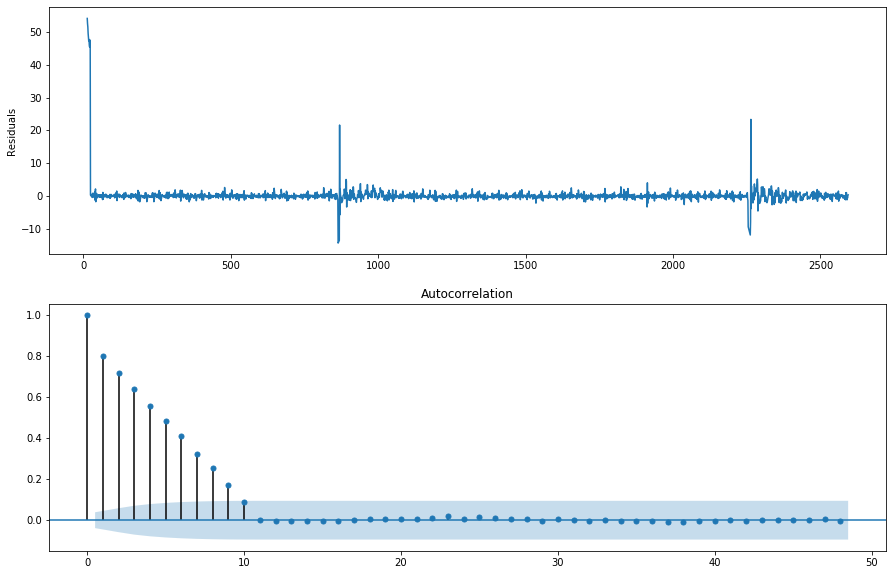

In [33]:
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)

print("Student's test: p=%f" % stats.ttest_1samp(best_model.resid[13:], 0)[1])
print("Dickey-Fuller test: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

In [34]:
def invboxcox(y,lmbda):
    # reverse Box Cox transformation
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda * y + 1) / lmbda))

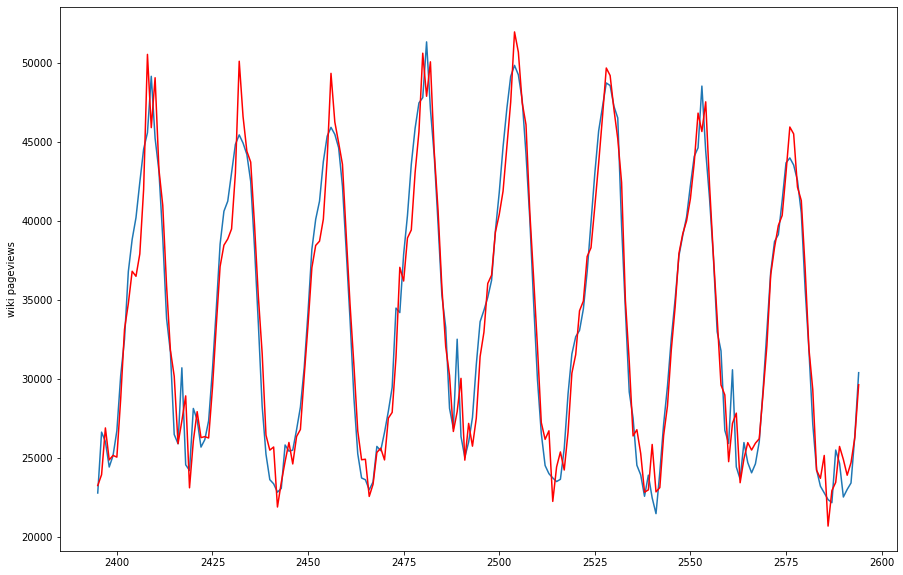

In [35]:
train_df['arima_model'] = invboxcox(best_model.fittedvalues, lmbda)

train_df.y.tail(200).plot()
train_df.arima_model[13:].tail(200).plot(color='r')
plt.ylabel('wiki pageviews');